In [1]:
##import libraries 

#dataprep
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np 

##keras stuff 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

#saving prediction output 
import pickle

#graphing
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
image_df = pd.read_csv('./data_multi_label/full_image_df.csv')
image_df = image_df.drop(columns='Unnamed: 0')
image_df.image_saved_as = image_df.image_saved_as.apply(lambda x: x +'.png')

print (image_df.shape)

image_df.head()

(2313, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13156,3_bromo_2_butanone_13156.png,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62791,3_bromo_2_butanone_62791.png,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13142,3_bromo_2_butanone_13142.png,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12413224,3_bromo_2_butanone_12413224.png,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,123858546,3_bromo_2_butanone_123858546.png,0.0


In [3]:
train = image_df.sample(frac = 0.80, random_state=1) # sampling with out replacement is the default

print (train.shape)

train.head()

(1850, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
959,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59922317,2_aminopropane_59922317.png,0.0
47,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3822501,4_picolylamine_3822501.png,1.0
1123,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15114725,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,1.0
553,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57616908,lysine_57616908.png,0.0
996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87701396,2_aminopropane_87701396.png,0.0


In [4]:
#Set a mask equal to the cid's which are in the training set that we made using pandas.sample 
mask = train['cid']

#for loop did not like the pandas.series, so I converted to a list 
mask = list(mask)


#this for loop checks the full dataframe (image_df) cid's against the ones in train
index_to_drop = []
for index, entry in enumerate(image_df['cid']):
#     print (entry)
    if entry in mask:
        index_to_drop.append(index)


# build the test dataframe by dropping the indicies which are not overlapping 
test = image_df.drop(labels=index_to_drop, axis=0)

print (test.shape)
print ('--'*25)
print (train.shape)
print ('--'*25)
print (image_df.shape)

test.head()

(463, 17)
--------------------------------------------------
(1850, 17)
--------------------------------------------------
(2313, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,123858546,3_bromo_2_butanone_123858546.png,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14692245,3_bromo_2_butanone_14692245.png,0.0
15,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12238842,4_picolylamine_12238842.png,1.0
20,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12425236,4_picolylamine_12425236.png,1.0
25,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87523068,4_picolylamine_87523068.png,1.0


In [5]:
train.columns

Index(['AKA', 'AKE', 'AKH', 'AKY', 'ALC', 'AMN', 'BNZ', 'COC', 'COH', 'COO',
       'COONH2', 'KEY', 'OH', 'SHH', 'cid', 'image_saved_as', 'ring'],
      dtype='object')

In [6]:
# We are going to look at a subset of features first 
features = ['AKA', 'AKE', 'AKH', 'AKY', 'ALC', 'AMN', 'BNZ', 'COC', 'COH', 'COO',
       'COONH2', 'KEY', 'OH', 'SHH', 'image_saved_as', 'ring']

#apply those feature constraints to the dataframes 
train_features = train[features]
test_features = test[features]

train_features.head()

,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,image_saved_as,ring
959,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2_aminopropane_59922317.png,0.0
47,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4_picolylamine_3822501.png,1.0
1123,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,1.0
553,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,lysine_57616908.png,0.0
996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2_aminopropane_87701396.png,0.0


In [7]:
#Conver the float into into ints
train_features[['AKA', 'AKE', 'AKH', 'AKY', 'ALC', 'AMN', 'BNZ', 'COC', 'COH', 'COO', 'COONH2', 'KEY', 'OH', 'SHH','ring']] = train_features[['AKA', 'AKE', 'AKH', 'AKY', 'ALC', 'AMN', 'BNZ', 'COC', 'COH', 'COO',
       'COONH2', 'KEY', 'OH', 'SHH','ring']].astype(int)


test_features[['AKA', 'AKE', 'AKH', 'AKY', 'ALC', 'AMN', 'BNZ', 'COC', 'COH', 'COO',
       'COONH2', 'KEY', 'OH', 'SHH','ring']] = test_features[['AKA', 'AKE', 'AKH', 'AKY', 'ALC', 'AMN', 'BNZ', 'COC', 'COH', 'COO',
       'COONH2', 'KEY', 'OH', 'SHH','ring']].astype(int)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [8]:
train_features.head()

,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,image_saved_as,ring
959,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2_aminopropane_59922317.png,0
47,1,0,0,0,0,1,1,0,0,0,0,0,0,0,4_picolylamine_3822501.png,1
1123,1,0,0,1,0,0,1,0,1,0,0,0,0,0,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,1
553,1,0,0,0,0,1,0,0,0,1,0,0,0,0,lysine_57616908.png,0
996,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2_aminopropane_87701396.png,0


In [11]:
train_features ['AKA']=train_features.AKA.replace(to_replace=1.0, value = 'AKA')
train_features ['AKE']=train_features.AKE.replace(to_replace=1.0, value = 'AKE')
train_features ['ring']=train_features.ring.replace(to_replace=1.0, value = 'ring')
train_features ['BNZ']=train_features.BNZ.replace(to_replace=1.0, value = 'BNZ')
train_features ['AKH']=train_features.AKH.replace(to_replace=1.0, value = 'AKH')
train_features ['AKY']=train_features.AKY.replace(to_replace=1.0, value = 'AKY')
train_features ['ALC']=train_features.ALC.replace(to_replace=1.0, value = 'ALC')
train_features ['AMN']=train_features.AMN.replace(to_replace=1.0, value = 'AMN')
train_features ['COC']=train_features.COC.replace(to_replace=1.0, value = 'COC')
train_features ['COH']=train_features.COH.replace(to_replace=1.0, value = 'COH')
train_features ['COO']=train_features.COO.replace(to_replace=1.0, value = 'COO')
train_features ['COONH2']=train_features.COONH2.replace(to_replace=1.0, value = 'COONH2')
train_features ['KEY']=train_features.KEY.replace(to_replace=1.0, value = 'KEY')
train_features ['OH']=train_features.OH.replace(to_replace=1.0, value = 'OH')
train_features ['SHH']=train_features.SHH.replace(to_replace=1.0, value = 'SHH')

test_features ['AKA']=test_features.AKA.replace(to_replace=1.0, value = 'AKA')
test_features ['AKE']=test_features.AKE.replace(to_replace=1.0, value = 'AKE')
test_features ['ring']=test_features.ring.replace(to_replace=1.0, value = 'ring')
test_features ['BNZ']=test_features.BNZ.replace(to_replace=1.0, value = 'BNZ')
test_features ['AKH']=test_features.AKH.replace(to_replace=1.0, value = 'AKH')
test_features ['AKY']=test_features.AKY.replace(to_replace=1.0, value = 'AKY')
test_features ['ALC']=test_features.ALC.replace(to_replace=1.0, value = 'ALC')
test_features ['AMN']=test_features.AMN.replace(to_replace=1.0, value = 'AMN')
test_features ['COC']=test_features.COC.replace(to_replace=1.0, value = 'COC')
test_features ['COH']=test_features.COH.replace(to_replace=1.0, value = 'COH')
test_features ['COO']=test_features.COO.replace(to_replace=1.0, value = 'COO')
test_features ['COONH2']=test_features.COONH2.replace(to_replace=1.0, value = 'COONH2')
test_features ['KEY']=test_features.KEY.replace(to_replace=1.0, value = 'KEY')
test_features ['OH']=test_features.OH.replace(to_replace=1.0, value = 'OH')
test_features ['SHH']=test_features.SHH.replace(to_replace=1.0, value = 'SHH');

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
train_features.head()

,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,image_saved_as,ring
959,AKA,0,0,0,0,AMN,0,0,0,0,0,0,0,0,2_aminopropane_59922317.png,0
47,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_3822501.png,ring
1123,AKA,0,0,AKY,0,0,BNZ,0,COH,0,0,0,0,0,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,ring
553,AKA,0,0,0,0,AMN,0,0,0,COO,0,0,0,0,lysine_57616908.png,0
996,AKA,0,0,0,0,AMN,0,0,0,0,0,0,0,0,2_aminopropane_87701396.png,0


In [12]:
test_features.head()

,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,image_saved_as,ring
4,AKA,0,AKH,0,0,0,0,0,0,0,0,KEY,0,0,3_bromo_2_butanone_123858546.png,0
7,AKA,0,AKH,0,0,0,0,0,0,0,0,KEY,0,0,3_bromo_2_butanone_14692245.png,0
15,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_12238842.png,ring
20,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_12425236.png,ring
25,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_87523068.png,ring


In [13]:
train_features.columns

Index(['AKA', 'AKE', 'AKH', 'AKY', 'ALC', 'AMN', 'BNZ', 'COC', 'COH', 'COO',
       'COONH2', 'KEY', 'OH', 'SHH', 'image_saved_as', 'ring'],
      dtype='object')

In [17]:
# using assign to make a label column, this is a req for the imagedatagen class, this is not unlike the way data must
# formatted when getting data ready for scala 

train_features = train_features.assign(label = list(train_features['AKA'].astype("str") + 
                                                ',' + train_features['AKE'].astype('str') + 
                                                ','+ train_features['ring'].astype("str") + 
                                                ',' + train_features['BNZ'].astype('str') + 
                                                ',' + train_features['AKH'].astype('str') +
                                                ',' + train_features['AKY'].astype('str') + 
                                                ',' + train_features['ALC'].astype('str') +
                                                ',' + train_features['AMN'].astype('str') +
                                                ',' + train_features['BNZ'].astype('str') +
                                                ',' + train_features['COC'].astype('str') +
                                                ',' + train_features['COH'].astype('str') +
                                                ',' + train_features['COO'].astype('str') +
                                                ',' + train_features['COONH2'].astype('str') +
                                                ',' + train_features['KEY'].astype('str') +
                                                ',' + train_features['OH'].astype('str') + 
                                                ',' + train_features['SHH'].astype('str')))



In [18]:
test_features = test_features.assign(label = list(test_features['AKA'].astype("str") + 
                                                ',' + test_features['AKE'].astype('str') + 
                                                ','+ test_features['ring'].astype("str") + 
                                                ',' + test_features['BNZ'].astype('str') + 
                                                ',' + test_features['AKH'].astype('str') +
                                                ',' + test_features['AKY'].astype('str') + 
                                                ',' + test_features['ALC'].astype('str') +
                                                ',' + test_features['AMN'].astype('str') +
                                                ',' + test_features['BNZ'].astype('str') +
                                                ',' + test_features['COC'].astype('str') +
                                                ',' + test_features['COH'].astype('str') +
                                                ',' + test_features['COO'].astype('str') +
                                                ',' + test_features['COONH2'].astype('str') +
                                                ',' + test_features['KEY'].astype('str') +
                                                ',' + test_features['OH'].astype('str') + 
                                                ',' + test_features['SHH'].astype('str')))

In [19]:
test_features.head()

,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,image_saved_as,ring,label
4,AKA,0,AKH,0,0,0,0,0,0,0,0,KEY,0,0,3_bromo_2_butanone_123858546.png,0,"AKA,0,0,0,AKH,0,0,0,0,0,0,0,0,KEY,0,0"
7,AKA,0,AKH,0,0,0,0,0,0,0,0,KEY,0,0,3_bromo_2_butanone_14692245.png,0,"AKA,0,0,0,AKH,0,0,0,0,0,0,0,0,KEY,0,0"
15,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_12238842.png,ring,"AKA,0,ring,BNZ,0,0,0,AMN,BNZ,0,0,0,0,0,0,0"
20,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_12425236.png,ring,"AKA,0,ring,BNZ,0,0,0,AMN,BNZ,0,0,0,0,0,0,0"
25,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_87523068.png,ring,"AKA,0,ring,BNZ,0,0,0,AMN,BNZ,0,0,0,0,0,0,0"


In [20]:
stopwords = '0'
# words = train_features['label'][0].split(',')     
# new_entry = [word for word in words if word not in stopwords]

df_entry = []

for i in train_features['label']:
    words = i.split(',')
    new_entry = [word for word in words if word not in stopwords]
    df_entry.append(new_entry)


# print (df_entry)
train_features["label"] = df_entry


## https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python

In [21]:
train_features.head()

,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,image_saved_as,ring,label
959,AKA,0,0,0,0,AMN,0,0,0,0,0,0,0,0,2_aminopropane_59922317.png,0,"[AKA, AMN]"
47,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_3822501.png,ring,"[AKA, ring, BNZ, AMN, BNZ]"
1123,AKA,0,0,AKY,0,0,BNZ,0,COH,0,0,0,0,0,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,ring,"[AKA, ring, BNZ, AKY, BNZ, COH]"
553,AKA,0,0,0,0,AMN,0,0,0,COO,0,0,0,0,lysine_57616908.png,0,"[AKA, AMN, COO]"
996,AKA,0,0,0,0,AMN,0,0,0,0,0,0,0,0,2_aminopropane_87701396.png,0,"[AKA, AMN]"


In [22]:
stopwords = '0'
# words = train_features['label'][0].split(',')     
# new_entry = [word for word in words if word not in stopwords]

df_entry = []

for i in test_features['label']:
    words = i.split(',')
    new_entry = [word for word in words if word not in stopwords]
    df_entry.append(new_entry)


# print (df_entry)
test_features["label"] = df_entry


## https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python

In [23]:
test_features.head()

,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,image_saved_as,ring,label
4,AKA,0,AKH,0,0,0,0,0,0,0,0,KEY,0,0,3_bromo_2_butanone_123858546.png,0,"[AKA, AKH, KEY]"
7,AKA,0,AKH,0,0,0,0,0,0,0,0,KEY,0,0,3_bromo_2_butanone_14692245.png,0,"[AKA, AKH, KEY]"
15,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_12238842.png,ring,"[AKA, ring, BNZ, AMN, BNZ]"
20,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_12425236.png,ring,"[AKA, ring, BNZ, AMN, BNZ]"
25,AKA,0,0,0,0,AMN,BNZ,0,0,0,0,0,0,0,4_picolylamine_87523068.png,ring,"[AKA, ring, BNZ, AMN, BNZ]"


In [24]:
### Data is properly formatted, now we can begin with the imagedatagen class 

#Instantiate the ImageDataGenerator 

datagen = ImageDataGenerator(rotation_range=30,rescale=1./255, validation_split=0.25) # shear_range=0.2

In [25]:
# We are fitting this class

batch = 8 #updating the size

training_generator = datagen.flow_from_dataframe(
    train_features, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label',
    subset='training',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 1388 images belonging to 15 classes.


In [26]:
validation_generator = datagen.flow_from_dataframe(
    train_features, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label',
    subset='validation',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 462 images belonging to 15 classes.


In [27]:
test_datagen = ImageDataGenerator(rescale=1./255.)


test_generator=test_datagen.flow_from_dataframe(
dataframe= test_features,
directory="./images_multi_label/",
x_col="image_saved_as",
y_col='label',
batch_size=batch,
# seed=42,
shuffle=False,
class_mode='categorical',
color_mode = 'grayscale',
target_size=(300,300))

Found 463 images belonging to 15 classes.


In [29]:
model = Sequential()

#add more layers/filter because of image

model.add(Conv2D(128, (5, 5), input_shape=(300, 300, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
          

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.50)) # 50% 
model.add(Dense(15)) # can convert back to 4 
model.add(Activation('sigmoid'))

model.summary()

          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 296, 296, 128)     3328      
_________________________________________________________________
batch_normalization_3 (Batch (None, 296, 296, 128)     512       
_________________________________________________________________
activation_5 (Activation)    (None, 296, 296, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 98, 98, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 94, 94, 64)        204864    
_________________________________________________________________
batch_normalization_4 (Batch (None, 94, 94, 64)        256       
__________

In [30]:
# model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

##
from keras import optimizers

ad_delta = optimizers.Adadelta(lr = 0.01, rho = 0.5, decay = 0.001)

# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00001, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer= ad_delta, metrics=['accuracy'])

In [31]:
history = model.fit_generator(generator = training_generator, 
                              steps_per_epoch= 10, 
                              epochs=10, validation_data= validation_generator, 
                                  validation_steps = 10
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10/10 [==============================] - 57s 6s/step - loss: 1.5377 - acc: 0.4667 - val_loss: 0.8461 - val_acc: 0.4883
Epoch 2/10
10/10 [==============================] - 56s 6s/step - loss: 1.1007 - acc: 0.5350 - val_loss: 0.7215 - val_acc: 0.5692
Epoch 3/10
10/10 [==============================] - 64s 6s/step - loss: 0.9313 - acc: 0.5725 - val_loss: 0.6051 - val_acc: 0.6667
Epoch 4/10
10/10 [==============================] - 88s 9s/step - loss: 0.8777 - acc: 0.6225 - val_loss: 0.5646 - val_acc: 0.7225
Epoch 5/10
10/10 [==============================] - 90s 9s/step - loss: 0.7876 - acc: 0.6625 - val_loss: 0.5160 - val_acc: 0.7758
Epoch 6/10
10/10 [==============================] - 76s 8s/step - loss: 0.7520 - acc: 0.6608 - val_loss: 0.5186 - val_acc: 0.7709
Epoch 7/10
10/10 [==============================] - 64s 6s/step - loss: 0.6894 - acc: 0.6900 - val_loss: 0.4945 - val_acc: 0.7892
Epoch 8/10
10/10 [========================

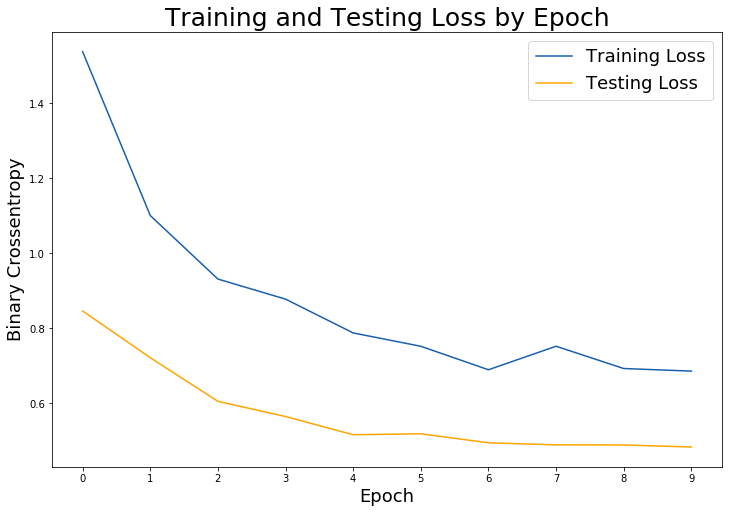

In [32]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks(range(10))

plt.legend(fontsize = 18);

In [33]:
#Testing 
metric = model.evaluate_generator(validation_generator, steps=10, verbose=1)



labels = model.metrics_names


# Show model performance.
print(f'{labels[0]}: {metric[0]}')
print(f'{labels[1]}: {metric[1]}')

10/10 [==============================] - 13s 1s/step
loss: 0.4770369644348438
acc: 0.8170940386943328


In [34]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=10,
verbose=1)

10/10 [==============================] - 14s 1s/step


In [35]:
training_generator.class_indices

{'AKA': 0,
 'AKE': 1,
 'AKH': 2,
 'AKY': 3,
 'ALC': 4,
 'AMN': 5,
 'BNZ': 6,
 'COC': 7,
 'COH': 8,
 'COO': 9,
 'COONH2': 10,
 'KEY': 11,
 'OH': 12,
 'SHH': 13,
 'ring': 14}

In [36]:
pred_class = (pred >= .5).astype(int)

In [37]:
pred_class

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [38]:
training_generator.class_indices

{'AKA': 0,
 'AKE': 1,
 'AKH': 2,
 'AKY': 3,
 'ALC': 4,
 'AMN': 5,
 'BNZ': 6,
 'COC': 7,
 'COH': 8,
 'COO': 9,
 'COONH2': 10,
 'KEY': 11,
 'OH': 12,
 'SHH': 13,
 'ring': 14}

In [41]:
# https://stackoverflow.com/questions/50988050/cnn-training-accuracy-is-1-0-and-validation-accuracy-is-1-0-prediction-return


import numpy as np
from keras.preprocessing import image


test_image = image.load_img('/Users/patrickcavins/Downloads/bnz.png', grayscale = True, target_size = (300, 300,1))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# training_generator.class_indices
# if result[0][0] == 1:
#     prediction = 'Yes'
# else:
#     prediction = 'No'

result

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.]],
      dtype=float32)

In [42]:
pred_val=model.predict_generator(validation_generator,
steps=10,
verbose=1)

10/10 [==============================] - 9s 937ms/step


In [43]:
pred_val

array([[0.41357315, 0.28158003, 0.16968039, ..., 0.15886608, 0.40205085,
        0.6829592 ],
       [0.37724644, 0.12483481, 0.34098417, ..., 0.18382111, 0.59188926,
        0.6452747 ],
       [0.61653936, 0.15385526, 0.1192618 , ..., 0.2234528 , 0.11786535,
        0.69993716],
       ...,
       [0.49606264, 0.11564612, 0.13003936, ..., 0.38480282, 0.57391953,
        0.57476294],
       [0.67187965, 0.037193  , 0.27389175, ..., 0.09053963, 0.17962801,
        0.8754587 ],
       [0.37748307, 0.27766588, 0.20131475, ..., 0.35222954, 0.33302975,
        0.5864484 ]], dtype=float32)

In [45]:
(pred_val >= .5).astype(int)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
## adding batch normalization to see if the model perform better 